In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
X = df.drop('sales',axis = 1)
y = df['sales']

In [5]:
from sklearn.preprocessing import PolynomialFeatures

In [6]:
# It is not a machine Learning Model rather it is a Feature converter ie it
# converts a feature into its degree of higher order
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

In [7]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [8]:
poly_features = polynomial_converter.transform(X)

In [9]:
poly_features.shape

(200, 9)

In [10]:
X.shape

(200, 3)

In [11]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [12]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [13]:
poly_features.shape

(200, 9)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(X_train,y_train)

LinearRegression()

In [19]:
test_predictions = model.predict(X_test)

In [20]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [21]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [22]:
MAE = mean_absolute_error(y_test,test_predictions)

In [23]:
MSE = mean_squared_error(y_test,test_predictions)

In [24]:
RMSE = np.sqrt(MSE)

In [25]:
MSE

0.4417505510403673

In [26]:
RMSE

0.6646431757269214

In [27]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [28]:
# create the different degree polynomial
# split poly feat train/test
# fit on train
# store/save the rmse for BOTH the train AND test
# PLOT teh results (error vs polyorder)

In [29]:
train_rmse_errors = []
test_rmse_errors = []

for d in range(1,10):
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)

In [30]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292231,
 0.4339344356902067,
 0.35170836883993606,
 0.25093429381786897,
 0.1945666472024403,
 5.423737279770718,
 0.14168056686637134,
 0.17093527228363956]

In [31]:
test_rmse_errors

[1.5161519375993877,
 0.6646431757269214,
 0.5803286825217238,
 0.5077742623175882,
 2.575837063490081,
 4.214027384734879,
 1374.9574048884183,
 4344.727850519797,
 93796.02671838581]

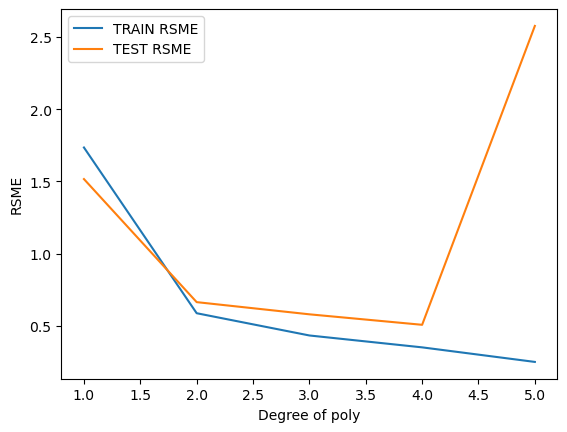

In [32]:
# Drawing only the 5 values of the train and test error
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RSME')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RSME')
plt.xlabel("Degree of poly")
plt.ylabel("RSME")
plt.legend()

In [33]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [34]:
full_converted_X = final_poly_converter.fit_transform(X)

In [35]:
final_model = LinearRegression()

In [36]:
final_model.fit(full_converted_X,y)

LinearRegression()

In [37]:
from joblib import dump,load

In [38]:
# Saving the final model that we hv created
dump(final_model,'final_poly_model.joblib')

['final_poly_model.joblib']

In [39]:
# Saving the final converter that we have created
dump(final_poly_converter,'final_converter.joblib')

['final_converter.joblib']

In [40]:
loaded_converter = load('final_converter.joblib')

In [41]:
loaded_model = load('final_poly_model.joblib')

In [42]:
# Lets test it on an instance of data
campaign = [[149,22,12]]

In [43]:
transformd_data = loaded_converter.fit_transform(campaign)

In [44]:
loaded_model.predict(transformd_data)

array([14.64501014])